<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies_by_duration = movies.sort_values('duration', ascending=True)

#more efficient method
print(movies.loc[movies['duration'] == movies['duration'].min()])
print(movies.loc[movies['duration'] == movies['duration'].max()])



     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107760710>]],
      dtype=object)

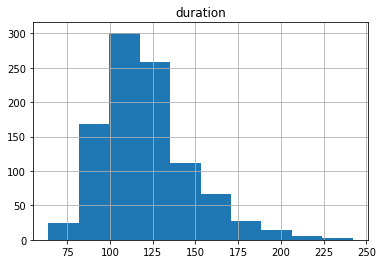

In [8]:
# Answer:
movies.hist('duration', bins=10)

#### Use a box plot to display that same data.

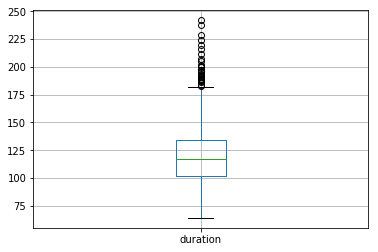

In [9]:
# Answer:
movies.boxplot('duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movie_rating = movies['content_rating'].value_counts()
print(movie_rating)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

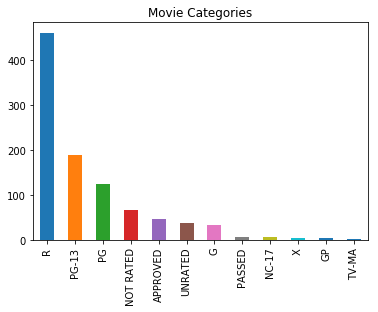

In [11]:
# Answer:
movie_rating.plot.bar(x = 'content_rating', y = 'values', title='Movie Categories')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

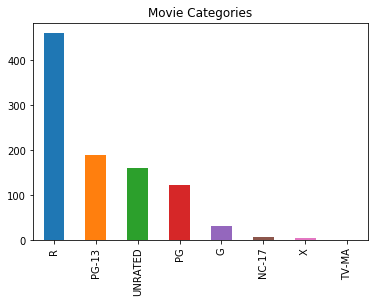

In [12]:
# Answer:
movies['content_rating'].replace({"NOT RATED":"UNRATED","APPROVED":"UNRATED", "PASSED":"UNRATED", "GP":"UNRATED"}, inplace = True)
movie_rating2 = movies['content_rating'].value_counts()
movie_rating2.plot.bar(x = 'content_rating', title='Movie Categories')

#### Convert the following content ratings to "NC-17": X, TV-MA.

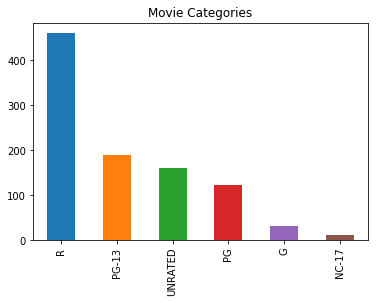

In [13]:
# Answer:
movies['content_rating'].replace({"X":"NC-17", "TV-MA":"NC-17"}, inplace=True)
movie_rating3 = movies['content_rating'].value_counts()
movie_rating3.plot.bar(x = 'content_rating', title='Movie Categories')

#### Count the number of missing values in each column.

In [14]:
# Answer
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

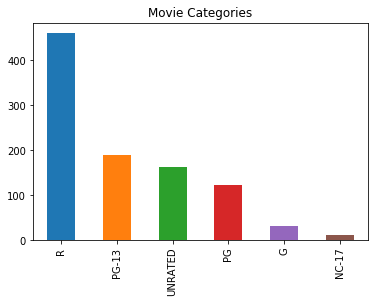

In [15]:
# Answer:
movies = movies.fillna('UNRATED')
movie_rating3 = movies['content_rating'].value_counts()
movie_rating3.plot.bar(x = 'content_rating', title='Movie Categories')

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
movies_long = movies.loc[movies['duration'] >= 120]
movies_short = movies.loc[movies['duration'] < 120]
avg_long = round(movies_long['star_rating'].mean(),2)
avg_short = round(movies_short['star_rating'].mean(),2)
print('average rating of movies 2 hours or longer is {0} stars'.format(avg_long))
print('average rating of movies shorter than 2 hours is {0} stars'.format(avg_short))


average rating of movies 2 hours or longer is 7.95 stars
average rating of movies shorter than 2 hours is 7.84 stars


#### Use a visualization to detect whether there is a relationship between duration and star rating.

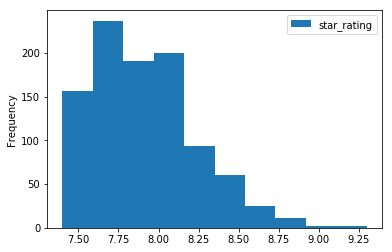

In [17]:
# Answer:
movies.plot.hist(x='duration', y='star_rating', bins=10)

#### Calculate the average duration for each genre.

In [18]:
# Answer:
avg_duration = pd.pivot_table(movies,index='genre',values=['duration'], aggfunc = np.mean)
genre_duration = avg_duration.reset_index()
genre_duration.rename(index = str, columns={'duration':'average_duration'}, inplace = True)
genre_duration

,genre,average_duration
0,Action,126.485294
1,Adventure,134.840000
2,Animation,96.596774
3,Biography,131.844156
4,Comedy,107.602564
5,Crime,122.298387
6,Drama,126.539568
7,Family,107.500000
8,Fantasy,112.000000
9,Film-Noir,97.333333


In [19]:
for i in range(0,len(genre_duration)):
    j = genre_duration['genre'].iloc[[i]].values
    k = genre_duration['average_duration'].iloc[[i]].values
    print('the average duration of {0} movies is {1} minutes.'.format(j,round(int(k))))

the average duration of ['Action'] movies is 126 minutes.
the average duration of ['Adventure'] movies is 134 minutes.
the average duration of ['Animation'] movies is 96 minutes.
the average duration of ['Biography'] movies is 131 minutes.
the average duration of ['Comedy'] movies is 107 minutes.
the average duration of ['Crime'] movies is 122 minutes.
the average duration of ['Drama'] movies is 126 minutes.
the average duration of ['Family'] movies is 107 minutes.
the average duration of ['Fantasy'] movies is 112 minutes.
the average duration of ['Film-Noir'] movies is 97 minutes.
the average duration of ['History'] movies is 66 minutes.
the average duration of ['Horror'] movies is 102 minutes.
the average duration of ['Mystery'] movies is 115 minutes.
the average duration of ['Sci-Fi'] movies is 109 minutes.
the average duration of ['Thriller'] movies is 114 minutes.
the average duration of ['Western'] movies is 136 minutes.


## Advanced level

#### Visualize the relationship between content rating and duration.

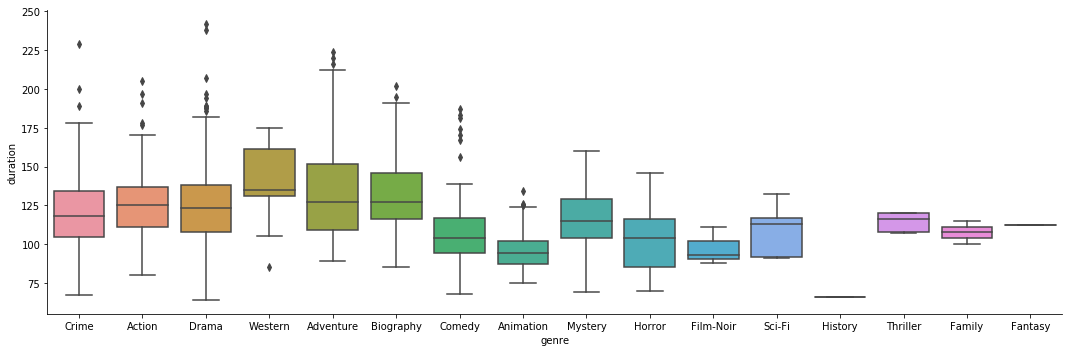

In [20]:
# Answer:
sns.catplot(x="genre", y="duration", kind="box", data=movies, aspect = 3)

#### Determine the top rated movie (by star rating) for each genre.

In [30]:
# Answer:
#movies.groupby(['genre'], sort=False)['star_rating'].max()
top_rating_in_genre = movies.groupby(['genre'])['star_rating'].transform(max) == movies['star_rating']
movies[top_rating_in_genre]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
movie_dup = movies.loc[movies['title'].duplicated() == True]
repeat_titles = list(movie_dup['title'])
for i in repeat_titles:
    movs = movies.loc[movies['title'] == i]
    if movs.duplicated().any() == True:
        print('{0} has duplicates in database'.format(i))
    else:
        print('All movies in database named {0} are unique'.format(i))

All movies in database named The Girl with the Dragon Tattoo are unique
All movies in database named Dracula are unique
All movies in database named Les Miserables are unique
All movies in database named True Grit are unique


### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Answer:
movie_genre_count = dict(movies['genre'].value_counts())
genres_over_10 = {key:val for key, val in movie_genre_count.items() if val > 10}
relevant_genres = list(genres_over_10.keys())
movie_list = movies[movies['genre'].isin(relevant_genres)]
avg_rating = pd.pivot_table(movie_list,index='genre',values=['star_rating'], aggfunc = np.mean)
genre_rating = avg_rating.reset_index()
genre_rating.rename(index = str, columns={'star_rating':'average_rating'}, inplace = True)

for i in range(0,len(genre_rating)):
    g = genre_rating['genre'].iloc[[i]].values
    s = genre_rating['average_rating'].iloc[[i]].values
    print('the average star rating of {0} movies is {1} stars.'.format(str(g),round(float(s),2)))

the average star rating of ['Action'] movies is 7.88 stars.
the average star rating of ['Adventure'] movies is 7.93 stars.
the average star rating of ['Animation'] movies is 7.91 stars.
the average star rating of ['Biography'] movies is 7.86 stars.
the average star rating of ['Comedy'] movies is 7.82 stars.
the average star rating of ['Crime'] movies is 7.92 stars.
the average star rating of ['Drama'] movies is 7.9 stars.
the average star rating of ['Horror'] movies is 7.81 stars.
the average star rating of ['Mystery'] movies is 7.97 stars.


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [25]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [32]:
#calculate average star rating of an actor
def actor_rating(actor):
    if actor in str(movies['actors_list']):
        movies_with_actor = movies[[actor in x for x in movies['actors_list']]]
        act_avg_rating = movies_with_actor['star_rating'].mean()
        print('The average rating for movies starring {0} is {1} stars'.format(actor,round(float(act_avg_rating),2)))
    else:
        print('not in database')
        
actor_rating('Tom Hanks')

The average rating for movies starring om Hanks is 8.01 stars


In [31]:
actor='Morgan Freeman'
movies_with_actor = movies[[actor in x for x in movies['actors_list']]]
act_avg_rating = movies_with_actor['star_rating'].mean()
print('The average rating for movies starring {0} is {1} stars'.format(actor,round(float(act_avg_rating),2)))

The average rating for movies starring Morgan Freeman is 8.09 stars
